# Introduction to Computer Programming

## Week 8.2: Curve Fitting 

* * *

<img src="img/full-colour-logo-UoB.png" alt="Bristol" style="width: 300px;"/>

It can be useful to define a relationship between two variables, x and y. 

We often want to 'fit' a function to a set of data points (e.g. experimental data).

Python has several tools (e.g. Numpy and Scipy packages) for finding relationships in a set of data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='LinearRegression'></a>
# Linear Regression
>*__Linear function:__ <br>Has form* $$f(x) = mx + c$$ <br> *where $m$ and $c$ are constants*.

Linear regression calculates a __linear function__ that minimizes the combined error between the fitted line and the data points. 

<img src="img/linear_regression.png" alt="Drawing" style="width: 300px;"/>

<a id='FittingPolynomialFunction'></a>
# Fitting a polynomial function

>*__Polynomial function:__ a function involving only non-negative integer powers of x.*

__1st order polynomial__ &nbsp; &nbsp; $y = \mathrm{a}x^1 + \mathrm{b}x^0$
<br>(linear function)

__2nd order polynomial__ &nbsp; &nbsp; $y = \mathrm{c}x^2 + \mathrm{d}x^1 + \mathrm{e}x^0$

__3rd order polynomial__ &nbsp; &nbsp; $y = \mathrm{f}x^3 + \mathrm{g}x^2 + \mathrm{h}x^1 + \mathrm{i}x^0$


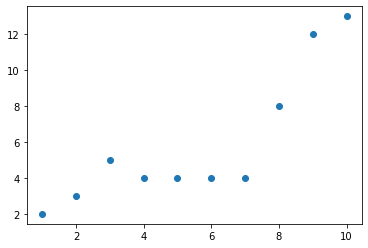

In [3]:
x = np.array([1, 6, 3, 4, 10, 2, 7, 8, 9, 5])
y = np.array([2, 4, 5, 4, 13, 3, 4, 8, 12, 4])
plt.plot(x,y,'o')

### Fitted function 
A polynomial function can be fitted using the `numpy.polyfit` function. 

Inputs: 
- independent variables 
- dependent variables 
- order of the polynomial 

Returns:
- coefficients of each term of the polynomial of specified order.

In [48]:
# coefficients of fited function
coeffs_1 = np.polyfit(x, y, 1) # 1st order poly 

coeffs_2 = np.polyfit(x, y, 2) # 2nd order poly

print(coeffs_1)
print(coeffs_2[0], coeffs_2[1], coeffs_2[2])

[ 1.07272727e+00 -5.61733355e-15]
0.19318181818181812 -1.0522727272727261 4.249999999999994


### Fitted data 
`numpy.poly1d` : generates fitted y data allowing the fitted function to be plotted.

Inputs:
- coefficients of the fitted polynomial function
- x data, monotonically sorted (for plottting) 
 
Returns:
- fitted y data

x values from original data (sorted monotonically for line plot) 

In [49]:
x_new = np.array(sorted(x))  # x values, sorted monotonically

Fitted y values 

In [50]:
# 1st order polynomial
yfit1 = np.poly1d(coeffs_1)(x_new) 

# 2nd order polynomial
yfit2 = np.poly1d(coeffs_2)(x_new) 

Essentially `poly1d` does the following pure Python operation:

In [51]:
yfit1 = coeffs_1[0]*x_new + coeffs_1[1]

yfit2 = coeffs_2[0]*x_new**2 + coeffs_2[1]*x_new + coeffs_2[2]

### Plotting fitted data

Text(0, 0.5, 'y')

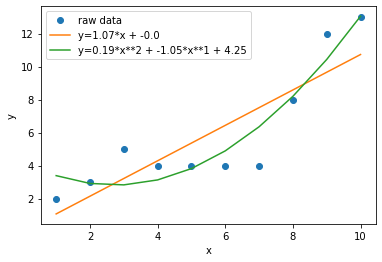

In [52]:
# write eqns as strings using coefficients
eqn_1 = f'y={round(coeffs_1[0],2)}*x + {round(coeffs_1[1],2)}'
eqn_2 = f'y={round(coeffs_2[0],2)}*x**2 + {round(coeffs_2[1],2)}*x**1 + {round(coeffs_2[2],2)}'


# plot data 
plt.plot(x, y, 'o', label='raw data') # raw data
plt.plot(x_new, yfit1, label=eqn_1);  # fitted 1D poly
plt.plot(x_new, yfit2, label=eqn_2);  # fitted 2D poly


# 'label' used to display the equation of the line as the legend
plt.legend()


# label the axes
plt.xlabel('x')
plt.ylabel('y')

<a id='FittingArbitraryFunction'></a>
# Fitting an Arbitrary Function

Curve fitting is not limited to polynomial functions. 

We can fit any function with unknown constants to the data using the function `curve_fit` from the `scipy` package.



### Fitted function 
Choose a function to fit e.g.
$$y = a e^{bx}$$

Define the function in the following format: 

In [53]:
def exponential(x, a, b): # input arguments are independent variable, then unknown constant(s) 
    y = a * np.exp(b*x)   
    return y              

Use `curve_fit` to find the constants that best fit the function to the data.
<br>Inputs:
 - the function to fit (in the format above)
 - the independent variable
 - the dependent variable
 

<br>Returns:
 - constants of fitted function
 - the covariance of the parameters (a statistical measure of accuracy)

In [54]:
from scipy.optimize import curve_fit

# constants of fitted function
c, cov = curve_fit(exponential, x, y)    

### Fitted data 
Generate fitted data by runnnig the function we defined (`exponential`), on:
- x data (sorted monotonically if plotting)
- fitted constants (`*` allows `c` to be a data structure of any length)

In [55]:
# input  to function to get fitted data
# use monotonically sorted x data
yfit = exponential(x_new, *c) 

### Plotting fitted data

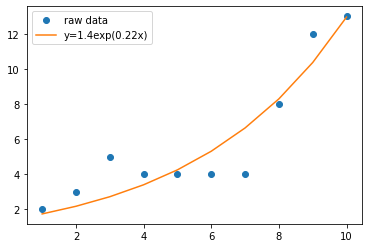

In [56]:
# write eqn as string using constants
eqn = f'y={round(c[0],2)}exp({round(c[1],2)}x)'

# plot data 
plt.plot(x, y, 'o', label='raw data') # raw data
plt.plot(x_new, yfit, label=eqn);     # fitted function
plt.legend()

How does `polyfit`/`curve_fit` determine which coefficients/constants give the best fit?

How can we measure 'goodness' of fit e.g. to choose order of polynomial for best fit line? 

<a id='RootMeanSquareError'></a>
# Root Mean Square Error (RMSE)

A widely used measure of the error between fitted values and raw data. 

__Error/residual, $\varepsilon$:__ <br>The difference between the raw value $y(x)$ and the fitted value $a(x)$. 

$$
\varepsilon = a(x) - y(x)
$$

*Sum* of the squared errors (so that negative and positive errors do not cancel) for $N$ data points: 

$$S = \sum_{i=1}^{N}\varepsilon_i^2$$


RMSE:
$$RMSE=\sqrt{\frac{1}{N}S}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}{\varepsilon_i^2}}$$

Smaller RMSE indictes smaller error (i.e. a better fit between raw and fitted data). 

We can optimise the fitted function by minimising the RMSE (used by `curve_fit`).

Also referred to as the *least squares*  approach.  

We can also use RMSE to compare fitted functions and determine statistically which is a better fit.  

In [35]:
def RMSE(x, y, yfit):
    "Returns the RMSE of a polynomial of specified order fitted to x-y data"
    # error
    e = (yfit - y)  
    
    # RMSE
    return np.sqrt(np.sum(e**2)/ len(x)) 

Let's compare the RMSE of each polynomial we fitted to the x,y data earlier 

In [59]:
for order in range(1, 3):
    coeffs = np.polyfit(x, y, order) # coefficients of fitted polynomial
    yfit = np.poly1d(coeffs)(x)      # no need to sort x monotonically, not plotting line
    rmse = RMSE(x,y,yfit)            # goodness of fit
    print(f'polynomial order {order}, RMSE = {rmse}')            

RMSE polynomial order 1 = 1.8964080880347554
RMSE polynomial order 2 = 1.2751114033327013


The second order polynomial gives a better fit.

What about the exponential function? 

In [63]:
c, cov = curve_fit(exponential, x, y)  # constants of fitted function
yfit = exponential(x, *c)              # no need to sort x monotonically, not plotting line
rmse = RMSE(x,y,yfit)                  # goodness of fit 
print(f'RMSE = {rmse}')            
print(f'{eqn}, RMSE = {rmse}')            

RMSE = 1.3338248760975377
y=1.4exp(0.22x), RMSE = 1.3338248760975377


Of the three functions tested, the second order polynomial gives a better fit, statitically.

# Summary
<a id='Summary'></a>
1. Find constants of fitted function
    - __Polynomial functions:__ Find coefficients of polynomial by running `polyfit` on data and specifying order of polynomial.
    - __Arbitrary functions:__ Find constants of arbitrary function by defining function to fit and running `curve_fit` on raw data and function to fit.  

1. Generate fitted data:
    - __Polynomial functions:__ Use `poly1D` to generate the fitted data using fitted coefficients for given input range.
    - __Arbitrary functions:__ Call function defined in step 1 using a range of x data and fitted coefficents as inputs.
    
1. Test goodness of fit: RMSE or other otimisation method. 


 

# In-class exercises

In [ ]:
Example 1: Fit third deree polynomial to data
    what is RMSE?
    

__Example 2__: 

The experimental data in `sample_data/signal_data.csv` resembles the function:

$$y = a \sin(x +b)$$

$a$ and $b$ are unknown constants.

1. Import the data from the file `sample_data/signal_data.csv`

1. Use `curve_fit` to find optimal values of $a$ and $b$.

1. Plot the raw data and the fitted data on the same graph. Label the data and include a legend.
1. Calculate the root mean square error (RMSE) of the fitted data and show the computed value as the plot title. 
1. Print the equation of the fitted line.
1. Save the figure in the sample_data folder as a .pdf file.

__Use comments in your code to explain what each part does.__


<a id='ReviewExercises'></a>
# 7. Review Exercises

Compete the exercises below.

In [ ]:
# Review Exercise 1: Curve Fitting

In [ ]:
# Review Exercise 2: Interpolation

## Review Exercise 3: Importing .csv Data and Working with Arrays

The file `sample_data/douglas_data.csv` contains a data set of recorded parameters for a sample of wooden beams.

__Part A : Importing data__
<br>Open the file and look at the data. 
What is the delimiter used?
Which rows and columns contain non-numeric data? 

Import the data using `np.loadtxt`, setting the data type to float. 
<br>Exclude the rows and columns containing non-numeric data.

*Remember : The use of scientific notation can be surpressed by:*

        np.set_printoptions(suppress=True)
        
__Part B : Manipulating Data__
<br>Select the first 10 rows of the array to create a new array.

The data in the last column is in units $\mathrm{N/mm}^2$. 

Convert the data in this column to units $\mathrm{N/m}^2$.

The area of each beam in the data set is 0.01 $\mathrm{m^2}$.
<br>The density of each beam is given in the fifth column. 
<br>The height of each beam is given in the sixth column. 
<br>Add a new column to the array that contains mass of each beam (kg) using:

__mass = area $\times$ height $\times$ density__


__Part C : Displaying Data__
<br>Print the mass of the 1st beam in the array.
<br>Print a string to indicate what this value means e.g.
                
       The mass of beam 1 is ...
       
<br>Print the data in odd numbered columns of row 5. 


In [ ]:
# Review Exercise 3A: Importing .csv Data and Working with Arrays

In [ ]:
# Review Exercise 3B :Manipulating Data

In [ ]:
# Review Exercise 3C: Displaying Data